In [1]:
import pandas as pd
from PIL import Image
import IPython.display as IPdisplay

from AnalyzeVLE import AnalyzeVLE
from BinaryDistillation import BinaryDistillation
from PureComponentData import purecomponentdata


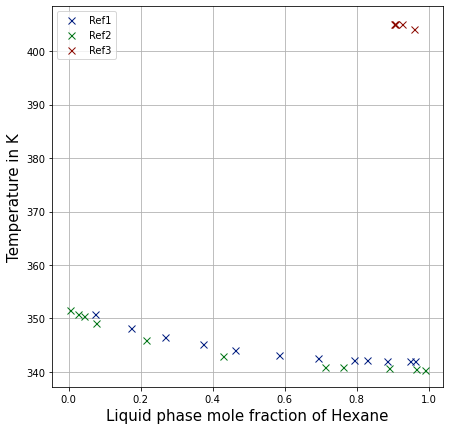

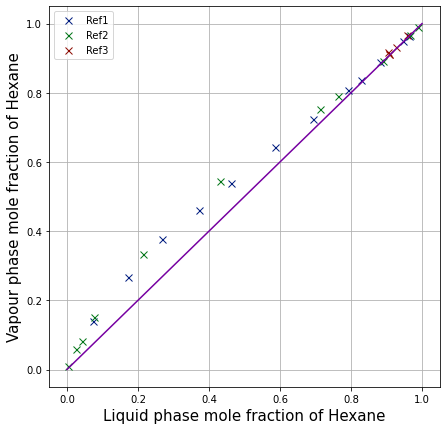

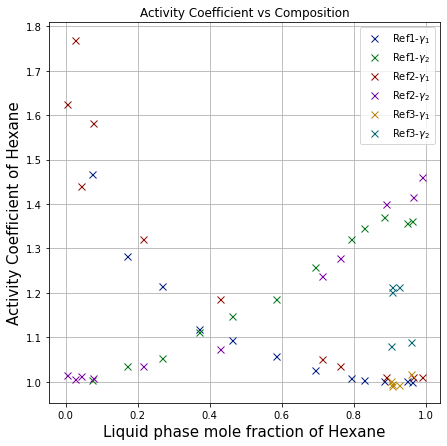

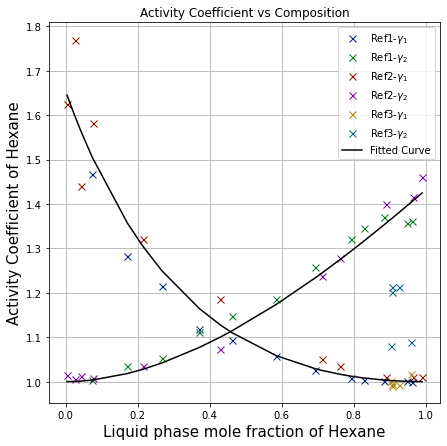

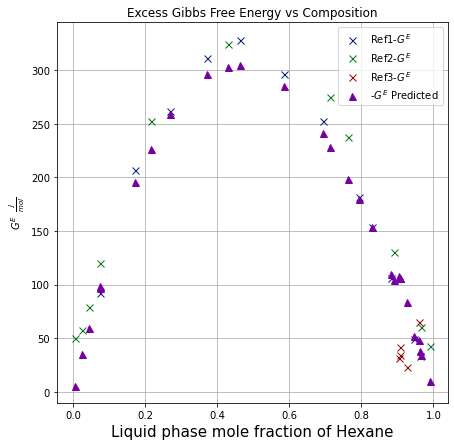

In [2]:
df_vle = pd.read_excel('benzene_hexane_vle.xlsx', usecols = 'A:E')
VLEObj = AnalyzeVLE(['n-Hexane', 'Benzene'], df_vle)
VLEObj.initialize_reading()
VLEObj.process_data()
VLEObj.visualize_data()
VLEObj.get_expt_gamma()
VLEObj.alpha = 0.1
nrtl, params, cost = VLEObj.fit_nrtl()
VLEObj.observe_fit()

In [3]:
Hexane = purecomponentdata.Compound("n-Hexane")  # More volatile component, (1)
Benzene = purecomponentdata.Compound("Benzene")  # Lesser volatile component, (2)

dict_compounds = {"Hexane":Hexane, "Benzene":Benzene} # Define the dictionary

In [4]:
dist = BinaryDistillation(nrtl, dict_compounds)
dist.xd = 0.65
dist.xf = 0.5
dist.q = 1
dist.R = 5

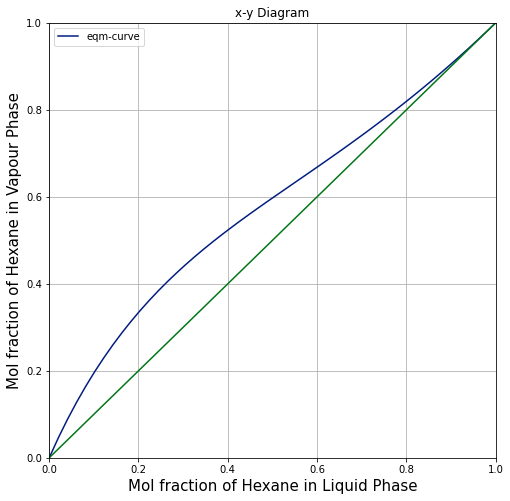

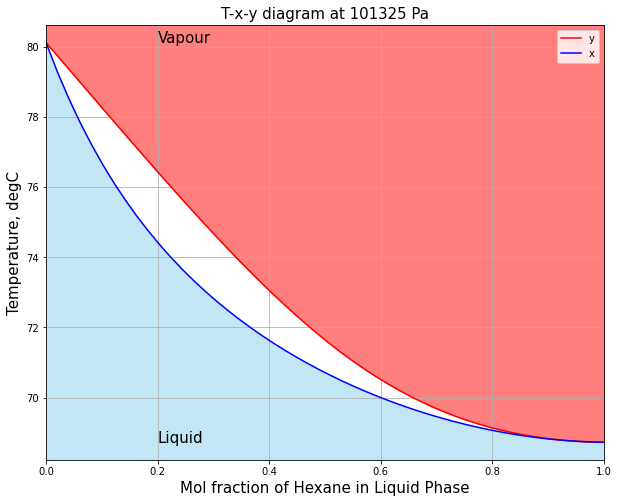

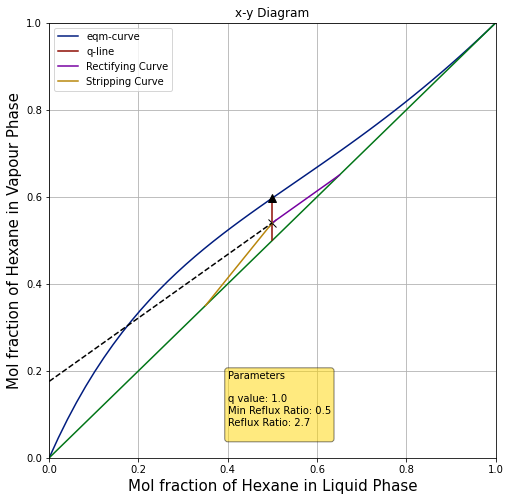

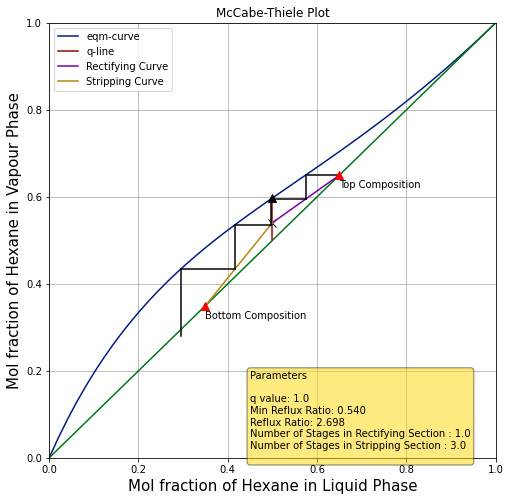

In [5]:
dist.show_xy()
dist.show_txy()
dist.show_opline()
dist.num_stages()

In [6]:
time = 0.1  #hr
dist.simulate_transient(time)

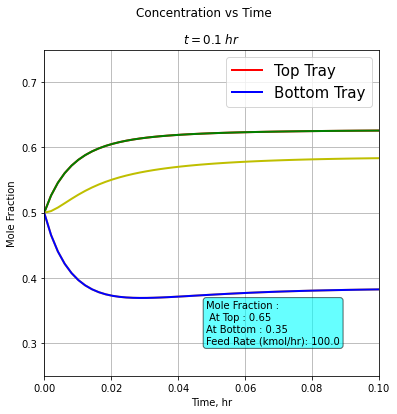

In [7]:
dist.show_anim()     
name = 'distillation_'+str(dist.names_list[0])+'_'+str(dist.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

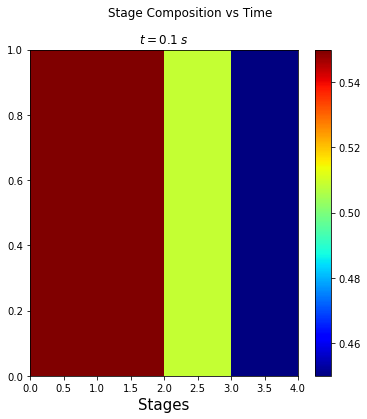

In [8]:
dist.animate_stage()     
name = 'distillation_stage'+str(dist.names_list[0])+'_'+str(dist.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

In [9]:
dist.duty_req(TCW = [25,80])
dist.show_distillation_chars()

,Parameter,Value
0,Feed Flowrate (kmol/hr),100.00
1,Feed Composition,0.50
2,Top Product Flowrate (kmol/hr),50.00
3,Top Product Composition,0.65
4,Bottom Product Flowrate (kmol/hr),50.00
5,Bottom Product Composition,0.35
6,Feed Quality (q),1.00
7,Minimum Reflux Ratio,0.54
8,Actual Reflux Ratio,2.70
9,Number of Stages needed,4.00


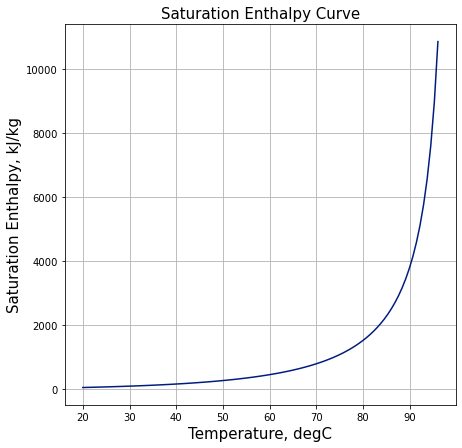

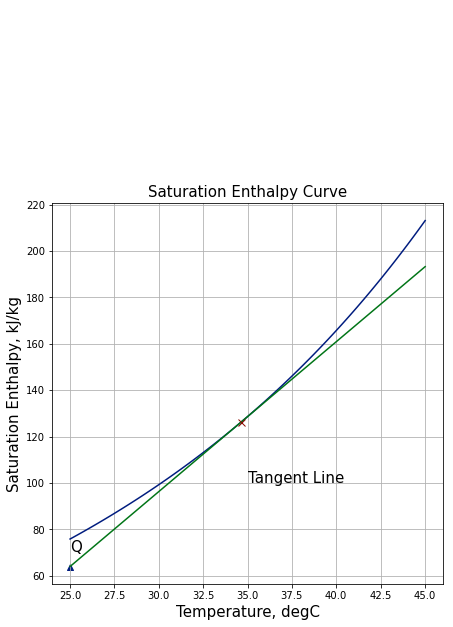

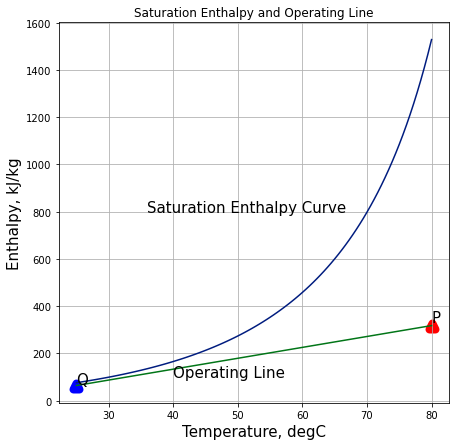

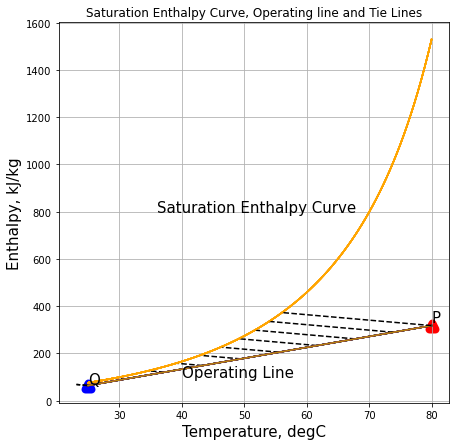

In [10]:
dist.start_cooling()
dist.show_sat_curve()
dist.show_tangent()
dist.show_cool_opline()
dist.show_tieline()

In [11]:
dist.calc_ntu_htu()
dist.show_cooling_tower_chars()

,Design Parameter,Value
0,Inlet Water Temperature (degC),80.00
1,Outlet Water Temperature (degC),25.00
2,Inlet Air Dry bulb Temperature (degC),31.00
3,Inlet Air Wet bulb Temperature (degC),22.00
4,Inlet Water Flowrate (kg/m^2hr),1489.70
5,Inlet Air Flowrate (kg/m^2hr),1349.10
6,NTU,9.39
7,HTU,0.22
8,Tower Height (m),2.11
